In [1]:
# Imports

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from google.colab import files
from google.colab import drive


from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import KBinsDiscretizer
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import IsolationForest
from sklearn.datasets import load_iris
from sklearn.feature_selection import SelectFromModel
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2


import tensorflow as tf
from keras import layers
from sklearn.model_selection import train_test_split
from keras import backend as K
from sklearn.preprocessing import MinMaxScaler


import torch


In [2]:
#Mount drive to access files

drive.mount('/content/drive')

#uploaded = files.upload()

Mounted at /content/drive


In [3]:
#Reading train and test data
pd.set_option('max_columns', 50)

df_train = pd.read_csv('/content/drive/My Drive/train.csv')
df_test = pd.read_csv('/content/drive/My Drive/test.csv')

In [ ]:
df_train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,...,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,...,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,...,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,...,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,...,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,...,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [4]:
#############################################
# Data observing and preprocess             #
#############################################


# Features where NA values are informative
df_na_info = ['Alley','BsmtQual','BsmtCond','BsmtExposure','BsmtFinType1','BsmtFinType2','FireplaceQu','GarageType','GarageFinish',
                       'GarageQual','GarageCond','PoolQC','Fence','MiscFeature']



#Features with real missing values
df_na_missing = ['MSSubClass','MSZoning','LotFrontage','LotArea','Street','LotShape','LandContour','Utilities','LotConfig','LandSlope','Neighborhood',
                          'Condition1','Condition2','BldgType','HouseStyle','OverallQual','OverallCond','YearBuilt','YearRemodAdd','RoofStyle','RoofMatl',
                          'Exterior1st','Exterior2nd','MasVnrType','MasVnrArea','ExterQual','ExterCond','Foundation','BsmtFinSF1','BsmtFinSF2','BsmtUnfSF',
                          'TotalBsmtSF','Heating','HeatingQC','CentralAir','Electrical','1stFlrSF','2ndFlrSF','LowQualFinSF','GrLivArea','BsmtFullBath',
                        'BsmtHalfBath','FullBath','HalfBath','KitchenQual','TotRmsAbvGrd','Functional','Fireplaces',#'GarageYrBlt',
                       'GarageCars','GarageArea','PavedDrive','WoodDeckSF','OpenPorchSF','EnclosedPorch','3SsnPorch','ScreenPorch','PoolArea','MiscVal',
                       'MoSold','YrSold','SaleType','SaleCondition']
# Ordinal variables

df_ordinals = ['OverallQual','OverallCond','ExterQual','ExterCond','BsmtQual','BsmtCond','HeatingQC','KitchenQual','FireplaceQu','GarageQual','GarageCond','PoolQC']

#Numerical variables

df_nums = pd.Series.to_frame(df_train.corr()['SalePrice'])
df_nums = df_nums.T.columns.tolist()


#Categorical variables

cat_vals = []

for i in df_train.columns:
  if i not in df_train[df_ordinals].columns and i not in df_train[df_nums].columns:
    cat_vals.append(i)


In [5]:
# Columns with missing values (with both informative and non-informative NA values)
print("Missing values in training set: ")
print(df_train.isnull().sum()[df_train.isnull().sum()>0])
print()
print("Missing values in the test set: ")
print(df_test.isnull().sum()[df_test.isnull().sum()>0])

Missing values in training set: 
LotFrontage      259
Alley           1369
MasVnrType         8
MasVnrArea         8
BsmtQual          37
BsmtCond          37
BsmtExposure      38
BsmtFinType1      37
BsmtFinType2      38
Electrical         1
FireplaceQu      690
GarageType        81
GarageYrBlt       81
GarageFinish      81
GarageQual        81
GarageCond        81
PoolQC          1453
Fence           1179
MiscFeature     1406
dtype: int64

Missing values in the test set: 
MSZoning           4
LotFrontage      227
Alley           1352
Utilities          2
Exterior1st        1
Exterior2nd        1
MasVnrType        16
MasVnrArea        15
BsmtQual          44
BsmtCond          45
BsmtExposure      44
BsmtFinType1      42
BsmtFinSF1         1
BsmtFinType2      42
BsmtFinSF2         1
BsmtUnfSF          1
TotalBsmtSF        1
BsmtFullBath       2
BsmtHalfBath       2
KitchenQual        1
Functional         2
FireplaceQu      730
GarageType        76
GarageYrBlt       78
GarageFinish     

In [6]:
from random import randrange

# Handling missing values

# Dropping data from features where missing value cardinality is less than 10, and NA is non-informative

def drop_nas(df):
  for i in df.columns:
    if(df[i].isnull().sum()<10 and df[i].isnull().sum()>0):
      df.drop(df.index[pd.isna(df[i])], inplace=True)


drop_nas(df_train)
drop_nas(df_test)


# Replacing informative missing values (where NA represents actual knowledge about a sample) with 'None', since these columns are not numerical dtypes

df_train[df_na_info] = df_train[df_na_info].fillna('None')
df_test[df_na_info] = df_test[df_na_info].fillna('None')

#Imputing missing values with mean or random values

def impute(df):
  for i in df.columns:
    if(i in df_na_missing):
      if(df[i].dtype == 'O'):
        df[i] = df[i].astype('str')
        col_values = np.unique(df[i])
        df[i].fillna(col_values[randrange(0,len(col_values))], inplace=True)
      if(df[i].dtype == 'int64' or df[i].dtype == 'float64'):
        df[i].fillna(df[i].mean(), inplace=True)



impute(df_train)
impute(df_test)

In [7]:
# Creating the label set

train_y = df_train['SalePrice']

In [8]:
#Encoding ordinal and categorical train data into numerical

ord = OrdinalEncoder()
lab = LabelEncoder()

df_train[df_ordinals] = ord.fit_transform(df_train[df_ordinals])

for i in cat_vals:
  df_train[i] = lab.fit_transform(df_train[i])

In [9]:
#Encoding ordinal and categorical test data into numerical

ord = OrdinalEncoder()
lab = LabelEncoder()

df_test[df_ordinals] = ord.fit_transform(df_test[df_ordinals])

for i in cat_vals:
  df_test[i] = lab.fit_transform(df_test[i])

In [10]:
# Binning some of the continous features


binner = KBinsDiscretizer(n_bins=3, encode='ordinal', strategy='uniform')
df_train[['1stFlrSF','GrLivArea','GarageArea']] = binner.fit_transform(df_train[['1stFlrSF','GrLivArea','GarageArea']])


print('New binned features:')
print(df_train[['1stFlrSF','GrLivArea','GarageArea']])

New binned features:
      1stFlrSF  GrLivArea  GarageArea
0          0.0        0.0         1.0
1          0.0        0.0         0.0
2          0.0        0.0         1.0
3          0.0        0.0         1.0
4          0.0        1.0         1.0
...        ...        ...         ...
1455       0.0        0.0         0.0
1456       1.0        0.0         1.0
1457       0.0        1.0         0.0
1458       0.0        0.0         0.0
1459       0.0        0.0         0.0

[1451 rows x 3 columns]


In [11]:
#Searching for inconsistent and outlier elements

for i in df_train.columns:
  print(i)
  print(np.unique(df_train[i]))

for i in df_test.columns:
  print(i)
  print(np.unique(df_train[i]))


Id
[   1    2    3 ... 1458 1459 1460]
MSSubClass
[ 20  30  40  45  50  60  70  75  80  85  90 120 160 180 190]
MSZoning
[0 1 2 3 4]
LotFrontage
[ 21.          24.          30.          32.          33.
  34.          35.          36.          37.          38.
  39.          40.          41.          42.          43.
  44.          45.          46.          47.          48.
  49.          50.          51.          52.          53.
  54.          55.          56.          57.          58.
  59.          60.          61.          62.          63.
  64.          65.          66.          67.          68.
  69.          70.          70.02763819  71.          72.
  73.          74.          75.          76.          77.
  78.          79.          80.          81.          82.
  83.          84.          85.          86.          87.
  88.          89.          90.          91.          92.
  93.          94.          95.          96.          97.
  98.          99.         100.         101

In [25]:
#Visualizing data


'''
fig, axs = plt.subplots(ncols=1, nrows=1, figsize=(10, 5),
                        constrained_layout=True)

axs.scatter(df_train['SalePrice'],df_train['GarageYrBlt'])

'''



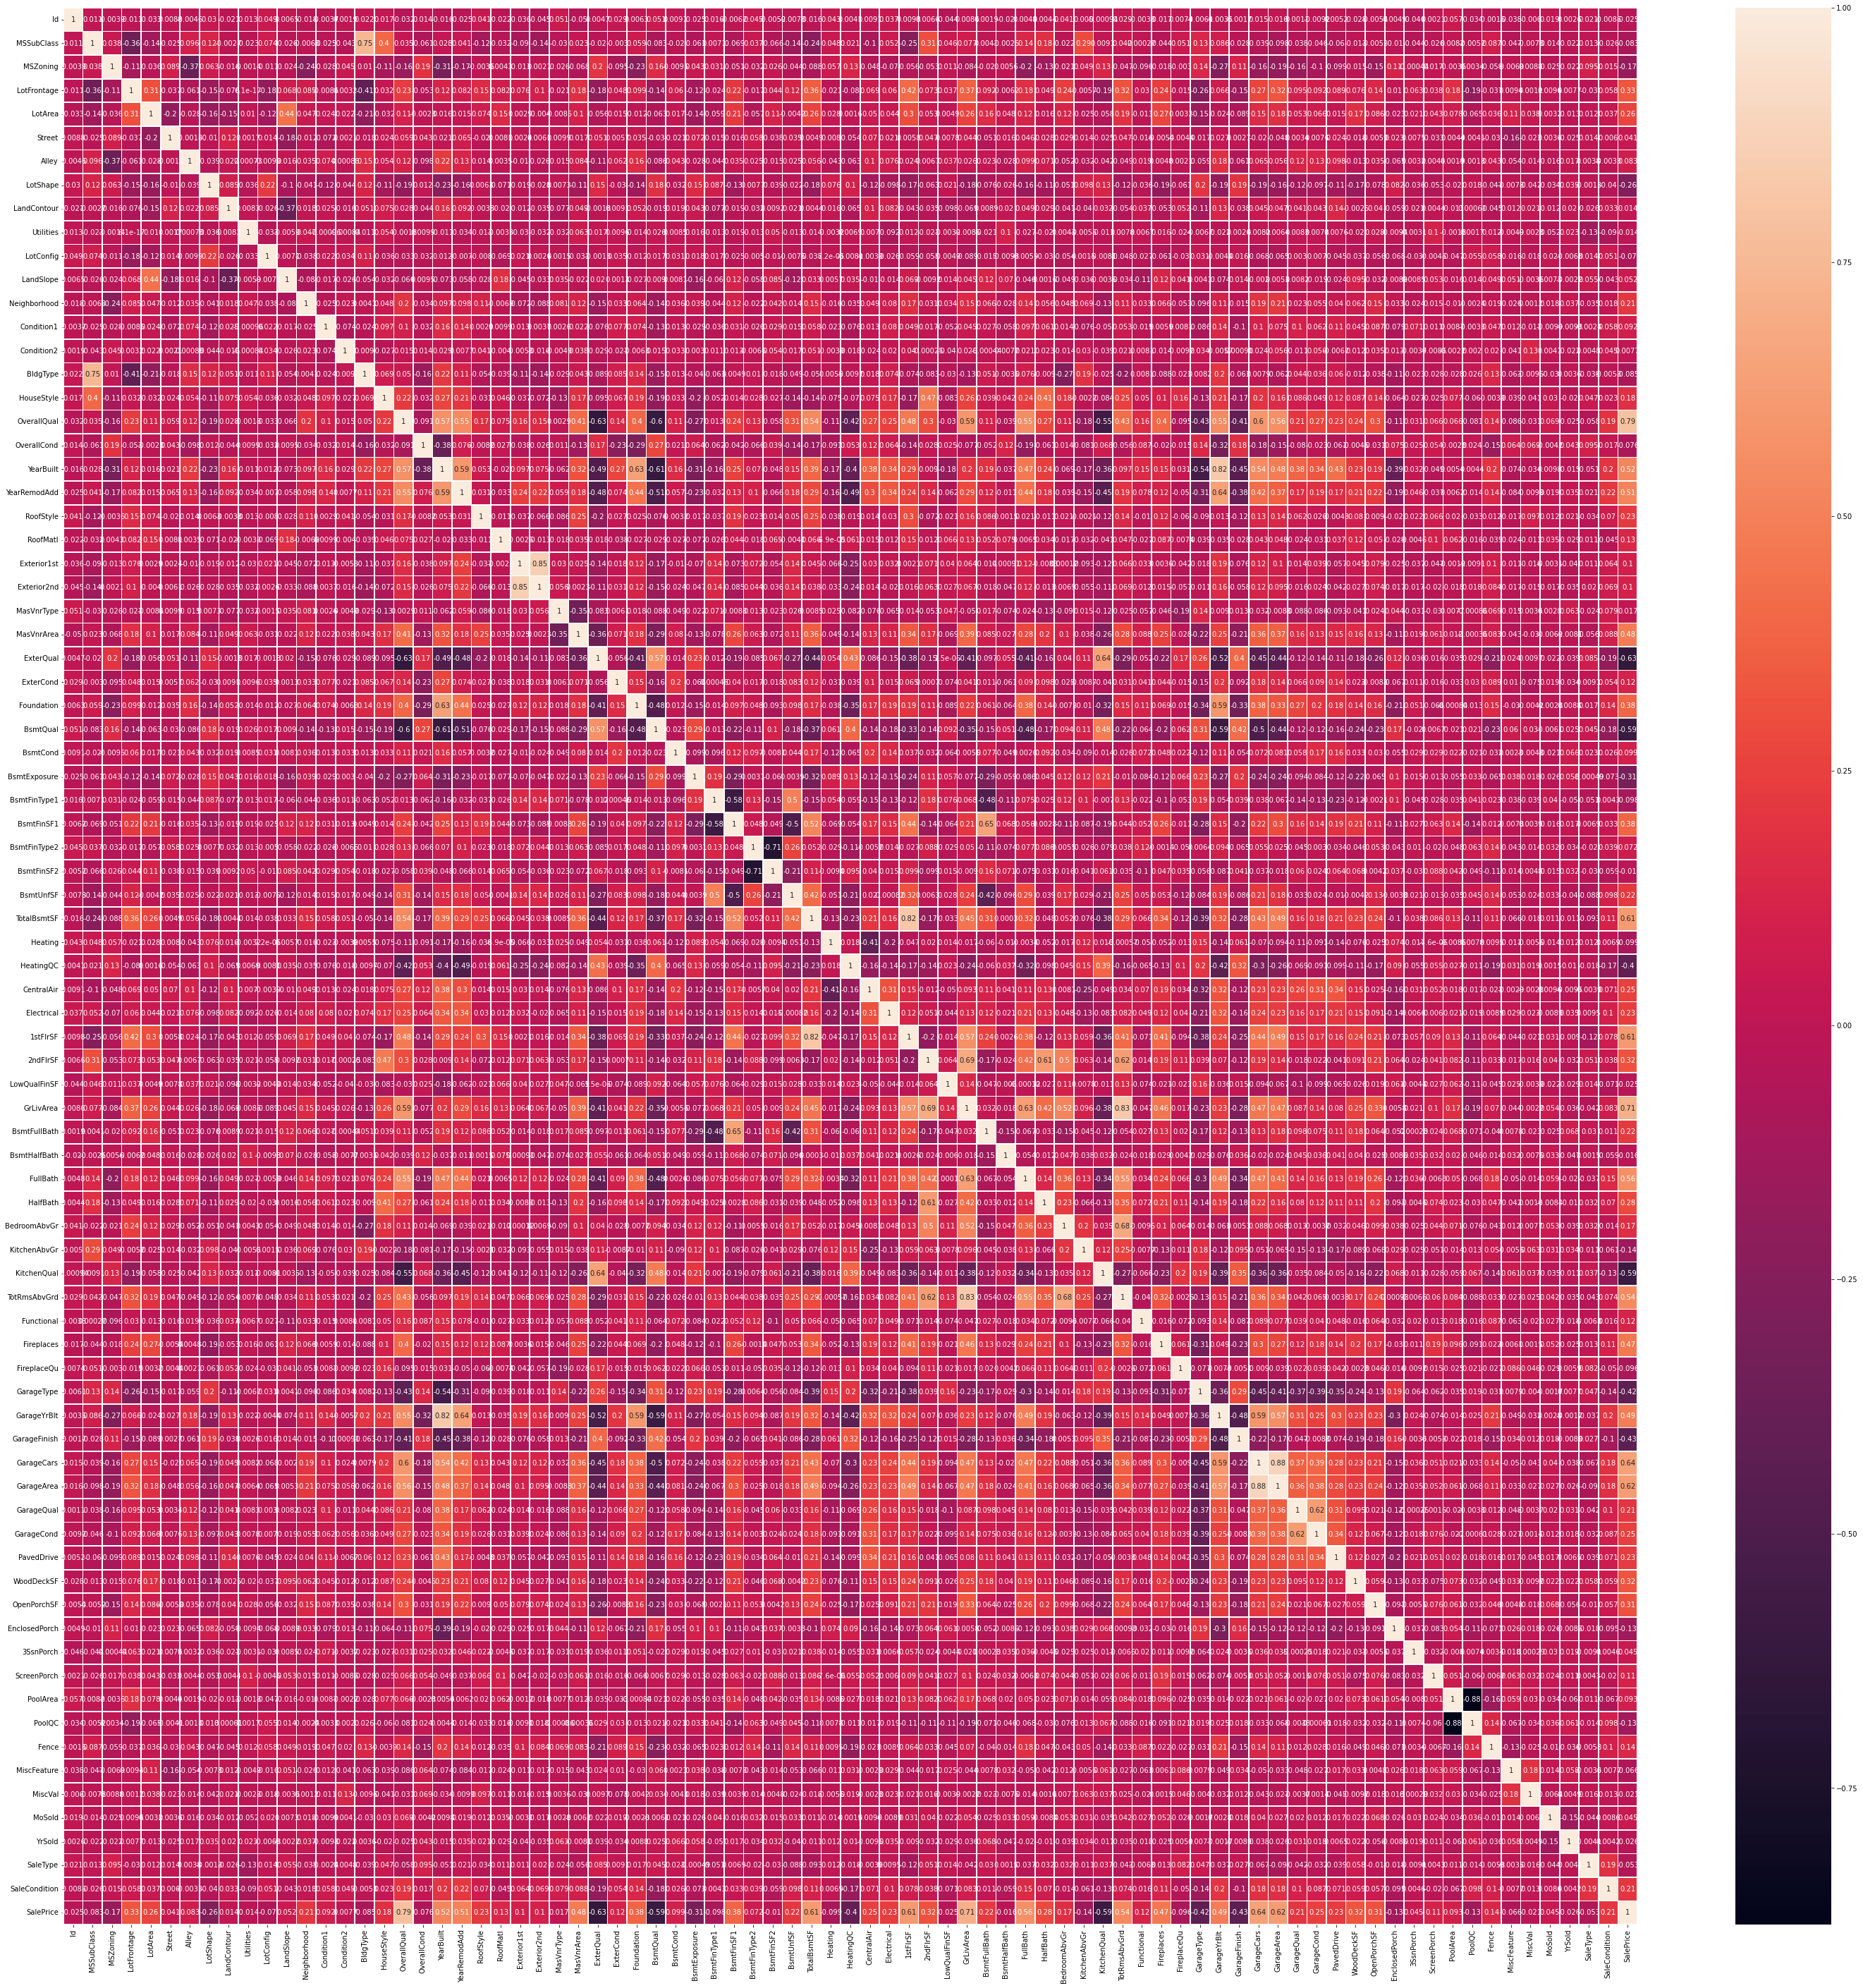

In [ ]:
#Creating correlation matrix for observing the data

fig, ax = plt.subplots(figsize=(50,50))
sns.heatmap(df_train.corr(), annot = True, linewidths=.7)

In [26]:
# Getting high correlation features with the target value

high_corr = df_train.corr()['SalePrice'].index[(df_train.corr()['SalePrice']>0.4) | (df_train.corr()['SalePrice']<-0.4)]
high_corrs = high_corr.to_list()

high_corrs

['OverallQual',
 'YearBuilt',
 'YearRemodAdd',
 'MasVnrArea',
 'ExterQual',
 'BsmtQual',
 'TotalBsmtSF',
 'HeatingQC',
 '1stFlrSF',
 'GrLivArea',
 'FullBath',
 'KitchenQual',
 'TotRmsAbvGrd',
 'Fireplaces',
 'GarageType',
 'GarageYrBlt',
 'GarageFinish',
 'GarageCars',
 'GarageArea',
 'SalePrice']

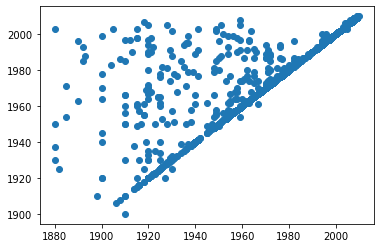

In [27]:
# YearBuilt and GarageYrBlt seems to have a linear relationship

plt.scatter(df_train[["YearBuilt"]],df_train[["GarageYrBlt"]])

In [28]:
# Based on the correlation matrix and the plot, the variable YearBuilt and GarageYrBlt is highly correlated
# and GarageYrBlt has some missing values, which can be predicted

print("Missing values for training set:")
print(df_train.isnull().sum()[df_train.isnull().sum()>0])
print() 
print("Missing values for test set:")
print(df_test.isnull().sum()[df_test.isnull().sum()>0])

Missing values for training set:
GarageYrBlt    81
dtype: int64

Missing values for test set:
GarageYrBlt    76
dtype: int64


In [29]:
# Getting the indexes and X,Y sets for YearBuilt and GarageYrBlt

df_garage_pred_train_X = df_train[["YearBuilt"]]
df_garage_pred_train_Y = df_train[["GarageYrBlt"]] 

df_garage_pred_train_X = df_garage_pred_train_X.drop(df_garage_pred_train_X.index[df_garage_pred_train_Y["GarageYrBlt"].isnull()])
df_garage_pred_train_Y = df_garage_pred_train_Y.drop(df_garage_pred_train_Y.index[df_garage_pred_train_Y["GarageYrBlt"].isnull()])

df_garage_pred_test_X = df_test[["YearBuilt"]]
df_garage_pred_test_Y = df_test[["GarageYrBlt"]] 

df_garage_pred_test_X = df_garage_pred_test_X.drop(df_garage_pred_test_X.index[df_garage_pred_test_Y["GarageYrBlt"].isnull()])
df_garage_pred_test_Y = df_garage_pred_test_Y.drop(df_garage_pred_test_Y.index[df_garage_pred_test_Y["GarageYrBlt"].isnull()])

df_garage_pred_missing = df_test["YearBuilt"][df_test["GarageYrBlt"].isnull()]
df_garage_pred_missing = np.asarray(df_garage_pred_missing).reshape(df_garage_pred_missing.shape[0],1)

In [30]:
# Because the task is linear regression, i can use the analytical solution so
# I will predict the missing values for GarageYrBlt from YearBuilt, with normal equation


def show_pred(X, theta):
    X = np.concatenate((np.ones(1),np.array(X)),axis=0)
    return np.round(np.dot(X, theta),1)


train_x = np.array([np.ones(len(df_garage_pred_train_X)),np.asarray(df_garage_pred_train_X).flatten()]).T
prices = np.linalg.inv(train_x.T.dot(train_x)).dot(train_x.T).dot(df_garage_pred_train_Y)
ars = np.array((2001)).reshape(1)


grg_index = df_train["GarageYrBlt"].index[pd.isna(df_train["GarageYrBlt"])]      #np.argwhere(np.asarray(pd.isna(df_train["GarageYrBlt"]))) --> ez rosszul adja vissza az indexeket, a df.index és pd.isna komnó a helyes
grg_na_index = df_train['YearBuilt'][np.squeeze(grg_index)]

print("Predicted Theta: ")
print(prices)


# Imputing missing values with hte predicted ones

for i in np.squeeze(grg_index):
  yr_arr = np.asarray(df_train['YearBuilt'][i]).reshape(1)
  df_train["GarageYrBlt"][i] = np.round(show_pred(yr_arr,prices))

Predicted Theta: 
[[611.25844765]
 [  0.69297748]]


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


In [31]:
# For the test set, i wil predict the GarageYrBlt values with a simple linear model

grg_model = LinearRegression()
reg = grg_model.fit(df_garage_pred_test_X,df_garage_pred_test_Y)

print("Accuracy: ")
print(reg.score(df_garage_pred_test_X,df_garage_pred_test_Y))

pred_values = np.asarray(grg_model.predict(df_garage_pred_missing), dtype=np.int64)

#Imputing the missing values with the predicted ones

grg_na_index = np.argwhere(np.asarray(df_test["GarageYrBlt"].isnull()))
grg_na_index = np.squeeze(grg_na_index)
pred_values = np.squeeze(pred_values)

grg_na_idx = np.asarray(pd.Series.to_frame(df_test['GarageYrBlt'][df_test['GarageYrBlt'].isnull()]).T.columns)

df_test["GarageYrBlt"][grg_na_idx] = pred_values

Accuracy: 
0.7111462952991935


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  "X does not have valid feature names, but"
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


In [32]:
print("Number of missing values for training data: ")
print(pd.isna(df_train["GarageYrBlt"]).sum())

print("Number of missing values for test data: ")
print(pd.isna(df_test["GarageYrBlt"]).sum())

Number of missing values for training data: 
0
Number of missing values for test data: 
0


In [33]:
# Outlier detection and removing outliers

isf = IsolationForest(contamination=0.1)
preds = isf.fit_predict(df_train)

norm_elements = np.argwhere(preds != -1)
norm_elements = norm_elements.flatten().tolist()
df_train = df_train.iloc[norm_elements]
train_y = train_y.iloc[norm_elements]

print('New train set without outliers: ')
print(df_train.shape)

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  "X does not have valid feature names, but"


New train set without outliers: 
(1306, 81)


In [34]:
# Selecting high correlating features

high_corrs.remove('SalePrice')

train_x = df_train[high_corrs]
test_x = df_test[high_corrs]


train_x.shape

(1306, 19)

In [35]:
# Creating the linear model

lin_model = LinearRegression()

reg = lin_model.fit(train_x,train_y)
lin_acc = round((reg.score(train_x,train_y)*100))
print("Accuracy for linear model: ")
print(str(lin_acc)+"%")


Accuracy for linear model: 
84%


In [36]:
# Subsetting features with TreeClassifier and the Gini score

clf = ExtraTreesClassifier(n_estimators=70)
clf = clf.fit(train_x, train_y)
clf.feature_importances_  

model = SelectFromModel(clf, prefit=True)
tree_x = model.transform(train_x)

print("New training set size with reduced features")
print(tree_x.shape)

tree_model = LinearRegression()

reg = tree_model.fit(tree_x,train_y)

tree_acc = round((reg.score(tree_x,train_y)*100))
print("Accuracy for liner model with tree feature selection: ")
print(str(tree_acc)+"%")

#TODO Cross-validation and grid search with arbitrary n_estimators

New training set size with reduced features
(1306, 7)
Accuracy for liner model with tree feature selection: 
77%


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:444: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"


In [37]:
# Feature subset selection with chi sqr score
chx = SelectKBest(chi2, k='all')

chi_x = chx.fit_transform(train_x,train_y)

print("New train set with reduced features: ")
print(chi_x.shape)

chi_model = LinearRegression()

reg = chi_model.fit(chi_x,train_y)

chi_acc = round((reg.score(chi_x,train_y)*100))
print("Accuracy for liner model with chi sqr feature selection: ")
print(str(chi_acc)+"%")

New train set with reduced features: 
(1306, 19)
Accuracy for liner model with chi sqr feature selection: 
84%


In [38]:
# Creating training and validation set for neural network

val_x = train_x[int(train_x.shape[0]*0.7):train_x.shape[0]]
val_y = train_y[int(train_y.shape[0]*0.7):train_y.shape[0]]
val_y = val_y[:,np.newaxis]

train_x = train_x[:int(train_x.shape[0]*0.7)]
train_y = train_y[:int(train_y.shape[0]*0.7)]
train_y = train_y[:,np.newaxis]

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  """
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  if __name__ == '__main__':


In [39]:
# Creating the network architecture

inp = tf.keras.layers.Input(train_x.shape[1])
x = tf.keras.layers.Dense(1)(inp)

early_stop = tf.keras.callbacks.EarlyStopping(monitor='loss', patience=3)

nn_model = tf.keras.Model(inputs=[inp],outputs = x)

nn_model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.01), loss='msle')

nn_model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 19)]              0         
                                                                 
 dense (Dense)               (None, 1)                 20        
                                                                 
Total params: 20
Trainable params: 20
Non-trainable params: 0
_________________________________________________________________


In [40]:
# Training the FC network

history = nn_model.fit(train_x,train_y, epochs=80, batch_size=8, callbacks=[early_stop], shuffle = True)

Epoch 1/80
115/115 [==============================] - 1s 2ms/step - loss: 17.3110
Epoch 2/80
115/115 [==============================] - 0s 3ms/step - loss: 11.3634
Epoch 3/80
115/115 [==============================] - 0s 2ms/step - loss: 9.3283
Epoch 4/80
115/115 [==============================] - 0s 2ms/step - loss: 8.0778
Epoch 5/80
115/115 [==============================] - 0s 1ms/step - loss: 7.1900
Epoch 6/80
115/115 [==============================] - 0s 1ms/step - loss: 6.5104
Epoch 7/80
115/115 [==============================] - 0s 1ms/step - loss: 5.9647
Epoch 8/80
115/115 [==============================] - 0s 1ms/step - loss: 5.5111
Epoch 9/80
115/115 [==============================] - 0s 1ms/step - loss: 5.1254
Epoch 10/80
115/115 [==============================] - 0s 1ms/step - loss: 4.7909
Epoch 11/80
115/115 [==============================] - 0s 1ms/step - loss: 4.4967
Epoch 12/80
115/115 [==============================] - 0s 1ms/step - loss: 4.2348
Epoch 13/80
115/115 [==

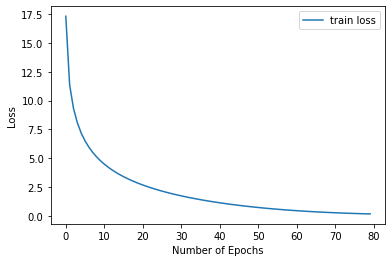

In [41]:
# Visualizing the loss

plt.clf()
plt.plot(history.history['loss'], label='train loss')
plt.xlabel('Number of Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [42]:
# Since i have relatively small amount of data, im gonna use the validation set to evaluate the model, and the test set to predict

regs = nn_model.evaluate(val_x,val_y)

trainss = nn_model.predict(test_x)

trainss[:5]

13/13 [==============================] - 0s 1ms/step - loss: 0.1611


array([[162776.3 ],
       [179246.48],
       [175392.48],
       [175057.14],
       [180116.94]], dtype=float32)

In [ ]:
# Sequential feature selection


'''
import joblib
import sys
sys.modules['sklearn.externals.joblib'] = joblib
from mlxtend.feature_selection import SequentialFeatureSelector as SFS
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=3)
model2 = LinearRegression()

sfs1 = SFS(model2, 
           k_features=18, 
           forward=True, 
           floating=False, 
           verbose=2,
           scoring=None,
           cv=0)

sfs1 = sfs1.fit(train_x,train_y)




sfs1.subsets_

'''

